# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [9]:
import pandas as pd
import collections as cl
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'C:\Program Files\Python36\Scripts\Pandas Tutorial\Chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [11]:
items = chipo.item_name
item_counts = cl.Counter(items)
item_counts.most_common(5)

[('Chicken Bowl', 726),
 ('Chicken Burrito', 553),
 ('Chips and Guacamole', 479),
 ('Steak Burrito', 368),
 ('Canned Soft Drink', 301)]

In [21]:
item_df = pd.DataFrame.from_dict(item_counts, orient='index')
item_df.head()

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [24]:
top5 = item_df[0].sort_values(ascending = False).head(5)
top5

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: 0, dtype: int64

In [36]:
type(top5.index)

pandas.core.indexes.base.Index

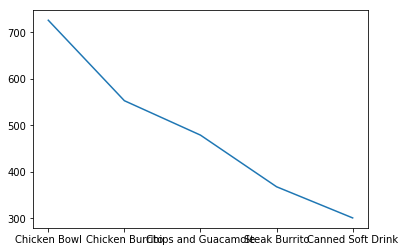

In [38]:
# draw plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(top5)

Text(0.5,1,'Most orderd items')

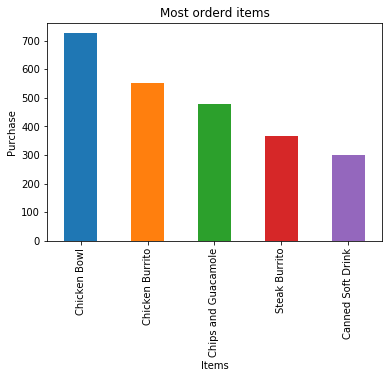

In [41]:
top5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Purchase')
plt.title('Most orderd items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [44]:
# get rid of dollar sign
dollarizer = lambda x:float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(dollarizer)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [47]:
# group by order_id
orders = chipo.groupby('order_id').sum()
orders.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


In [49]:
orders.item_price.max()

205.25

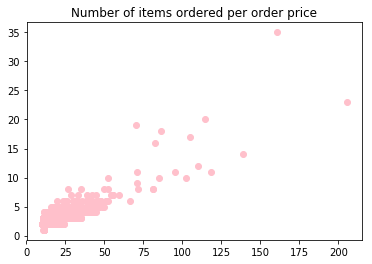

In [52]:
# scatter plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title =ax.set_title('Number of items ordered per order price')
points = ax.scatter(orders['item_price'], orders['quantity'], c = 'pink')

### Step 7. BONUS: Create a question and a graph to answer your own question.